# Recommender System Using Amazon Reviews

- Base Dataset: 
    - Main dataset page: 
        - https://nijianmo.github.io/amazon/index.html
    - Download dataset: 
        - http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Clothing_Shoes_and_Jewelry_5.json.gz


- Subset Datset to use Recommender system: 
    - Clothing_Shoes_and_Jewelry_5_reviewerID_asin_overall_unixReviewTime.csv
    

### Description of columns 
#### - Clothing_Shoes_and_Jewelry_5_reviewerID_asin_overall_unixReviewTime.csv
- reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
    - Ex) http://www.amazon.com/gp/cdp/member-reviews/A2SUAM1J3GNN3B
- asin - ID of the product, e.g. 0000013714
    - Ex) http://www.amazon.com/dp/0000013714
- overall - rating of the product
- unixReviewTime - time of the review (unix time)

In [102]:
#### To measure all running time
# https://github.com/cpcloud/ipython-autotime

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 615 µs


In [103]:
import pandas as pd

import gzip
import json

from pandas_profiling import ProfileReport

time: 450 µs


## Load dataset and analysis
- Download Clothing_Shoes_and_Jewelry_5_reviewerID_asin_overall_unixReviewTime.csv
    - https://drive.google.com/open?id=1kzQBEAeQEcdyo6UIG4fWnrWd63pC_E-L

In [104]:
review_orgin_df = pd.read_csv('Clothing_Shoes_and_Jewelry_5_reviewerID_asin_overall_unixReviewTime.csv')

time: 5.85 s


In [4]:
print("Shape of data: ", review_orgin_df.shape)
print("Column of data: ", review_orgin_df.columns)

Shape of data:  (11285464, 4)
Column of data:  Index(['reviewerID', 'asin', 'overall', 'unixReviewTime'], dtype='object')
time: 1.27 ms


#### Data profiling

In [5]:
# profile = ProfileReport(review_orgin_df, 
#                         title='Clothing_Shoes_and_Jewelry_5_reviewerID_asin_overall_unixReviewTime', 
#                         minimal=True)
# profile.to_file(output_file="Clothing_Shoes_and_Jewelry_5_josn-Profiling-Report.html")
# profile.to_notebook_iframe()

time: 348 µs


# Background

- E-commerce companies like Amazon uses different recommendation systems to provide suggestions to the customers.
- Amazon uses currently item-item collaberrative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. 
- This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in.

<img src="refer_pics/1.png">

## Types of recommendations
There are mainly 6 types of the recommendations systems :

1. Popularity based systems : 
    - It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
2. Classification model based: 
    - It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the prodcut.
3. Content based recommedations:
    - It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
4. Collaberative Filtering:
    - It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. 
    - it is mainly of two types: a) User-User b) Item -Item
5. Hybrid Approaches:
    - This system approach is to combine collaborative filtering, content-based filtering, and other approaches .
6. Association rule mining :
    - Association rules capture the relationships between items based on their patterns of co-occurrence across transactions.

## Attribute Information
- reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
    - Ex) http://www.amazon.com/gp/cdp/member-reviews/A2SUAM1J3GNN3B
- asin - ID of the product, e.g. 0000013714
    - Ex) http://www.amazon.com/dp/0000013714
- overall - rating of the product
- unixReviewTime - time of the review (unix time)    

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

time: 75.6 ms


/home/jh/anaconda3/envs/For_Keras_Official/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
review_orgin_df.head()

,reviewerID,asin,overall,unixReviewTime
0,A2IC3NZN488KWK,0871167042,5,1399161600
1,A30FG02C424EJ5,0871167042,5,1396224000
2,A2G9GWQEWWNQUB,0871167042,5,1432944000
3,A3NI5OGW35SLY2,0871167042,5,1424476800
4,A1OPRA4NE56EV6,0871167042,5,1421798400


time: 6.38 ms


In [8]:
review_orgin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11285464 entries, 0 to 11285463
Data columns (total 4 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   reviewerID      object
 1   asin            object
 2   overall         int64 
 3   unixReviewTime  int64 
dtypes: int64(2), object(2)
memory usage: 344.4+ MB
time: 12.5 ms


In [9]:
#Five point summary 
review_orgin_df.describe()['overall'].T

count    1.128546e+07
mean     4.277177e+00
std      1.130252e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

time: 426 ms


In [10]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(review_orgin_df.overall.min()))
print('Maximum rating is: %d' %(review_orgin_df.overall.max()))

Minimum rating is: 1
Maximum rating is: 5
time: 16 ms


- Handling Missing values

In [11]:
#Check for missing values
print('Number of missing values across columns: \n',review_orgin_df.isnull().sum())

Number of missing values across columns: 
 reviewerID        0
asin              0
overall           0
unixReviewTime    0
dtype: int64
time: 626 ms


### Ratings 
    - Most of the people has given the rating of 5

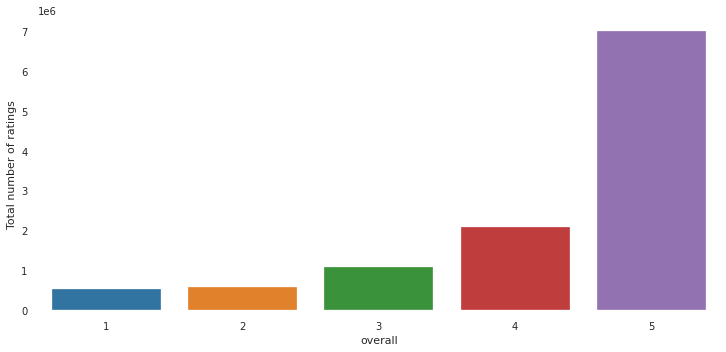

time: 2.31 s


In [12]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("overall", data=review_orgin_df, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")

### Unique Users and products

In [13]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",review_orgin_df.shape[0])
print("Total No of Users   :", len(np.unique(review_orgin_df.reviewerID)))
print("Total No of products  :", len(np.unique(review_orgin_df.asin)))

Total data 
--------------------------------------------------

Total no of ratings : 11285464
Total No of Users   : 1219678
Total No of products  : 376858
time: 22.5 s


### Analyzing the rating ( overall )

In [14]:
#Analysis of rating given by the user 
no_of_rated_products_per_user = review_orgin_df.groupby(by='reviewerID')['overall'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

reviewerID
ALFRMOGTO1K4M     494
AVU1ILDDYW301     461
A2RYWPOL4NN2KG    418
A3W5A9X3HHACQT    354
A2QDOJFFLFGF18    343
Name: overall, dtype: int64

time: 4.06 s


In [15]:
##### how-to-format-how-a-numpy-array-prints-in-pytho
# https://kite.com/python/answers/how-to-format-how-a-numpy-array-prints-in-python

np.set_printoptions(suppress=True)

time: 325 µs


In [16]:
no_of_rated_products_per_user.describe()

count    1.219678e+06
mean     9.252822e+00
std      7.321460e+00
min      3.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      4.940000e+02
Name: overall, dtype: float64

time: 39.9 ms


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Quantiles and their Values')

Text(0, 0.5, 'No of ratings by user')

Text(0.5, 0, 'Value at the quantile')

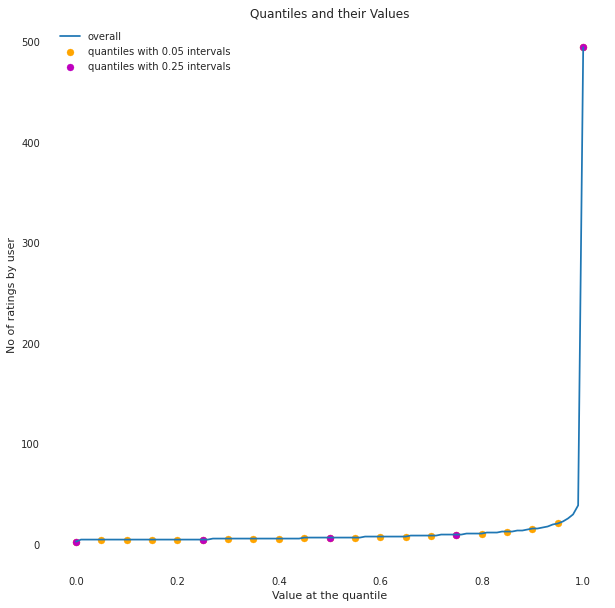

time: 296 ms


In [17]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [18]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 5481

time: 81.9 ms


# 1. Popularity Based Recommendation

- Popularity based recommendation system works with the trend. 
- It basically uses the items which are in trend right now. 
    - For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.
- The problems with popularity based recommendation system is that the personalization is not available with this method 
    - i.e. even though you know the behaviour of the user you cannot recommend items accordingly.
    
<img src="./refer_pics/2.png">    

### Getting the new dataframe which contains users who has given 50 or more ratings

In [64]:
new_df=review_orgin_df.groupby("asin").filter(lambda x:x['overall'].count() >=50)

time: 1min 7s


Text(0.5, 1.0, '# RATINGS per Product')

Text(0.5, 0, 'Product')

Text(0, 0.5, 'No of ratings per product')

[]

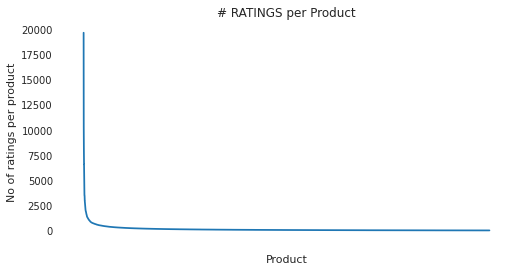

time: 507 ms


In [65]:
no_of_ratings_per_product = new_df.groupby(by='asin')['overall'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [66]:
#Average rating of the product 

new_df.groupby('asin')['overall'].mean().head()

asin
3979050432    4.258065
5120053084    4.544444
5120053351    4.000000
7709260373    4.432432
B00001T38Y    4.134615
Name: overall, dtype: float64

time: 336 ms


In [67]:
new_df.groupby('asin')['overall'].mean().sort_values(ascending=False).head()

asin
B00QXEK5WA    5.000000
B00AZR3TR4    4.960784
B002YIR9SM    4.952381
B0015PD4NE    4.945205
B00N8MVFOC    4.944000
Name: overall, dtype: float64

time: 340 ms


- Total number of rating for product

In [68]:
new_df.groupby('asin')['overall'].count().sort_values(ascending=False).head()

asin
B000YXC2LI    19693
B00028AVDG    13895
B0001YRE04    13813
B000XDJ7LW    12464
B000XBM1L2    12442
Name: overall, dtype: int64

time: 337 ms


In [69]:
ratings_mean_count = pd.DataFrame(new_df.groupby('asin')['overall'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('asin')['overall'].count())
ratings_mean_count.head()

,overall,rating_counts
asin,,
3979050432,4.258065,62
5120053084,4.544444,180
5120053351,4.000000,52
7709260373,4.432432,74
B00001T38Y,4.134615,52


time: 674 ms


In [70]:
ratings_mean_count['rating_counts'].max()

19693

time: 1.55 ms


<Figure size 576x432 with 0 Axes>

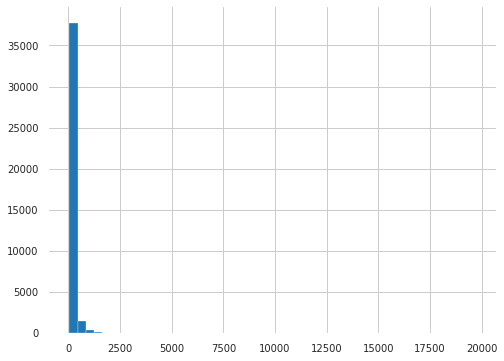

time: 238 ms


In [71]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

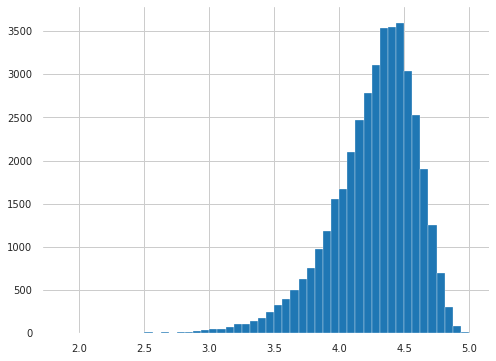

time: 357 ms


In [72]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['overall'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

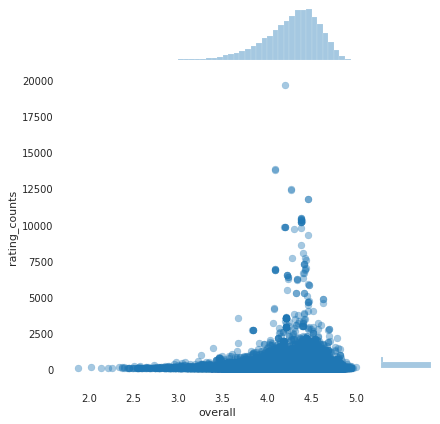

time: 647 ms


In [73]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='overall', y='rating_counts', data=ratings_mean_count, alpha=0.4)

### *** Recommned products based on Popularity Based Recommendation

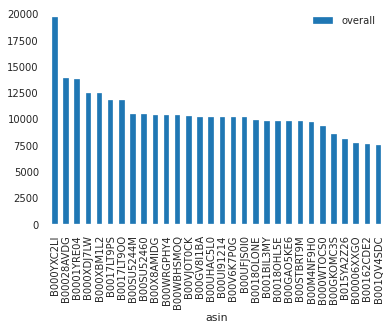

time: 588 ms


In [74]:
popular_products = pd.DataFrame(new_df.groupby('asin')['overall'].count())
most_popular = popular_products.sort_values('overall', ascending=False)
most_popular.head(30).plot(kind = "bar")

# 2. Collaberative filtering (Item-Item recommedation)

- Collaborative filtering is commonly used for recommender systems. 
- These techniques aim to fill in the missing entries of a user-item association matrix. 
- We are going to use collaborative filtering (CF) approach. 
    - CF is based on the idea that the best recommendations come from people who have similar tastes. 
    - In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.
    - Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.
    
#### using python module: https://surprise.readthedocs.io/en/stable/    

In [75]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

time: 503 µs


# **** Sampling data for testing
- Original sample size: (6940556, 4)
- Size of sample: 10000

In [76]:
NUM_SAMPLE = 10000

print("shape of data: ", new_df.shape)
sample_df = new_df.sample(n=NUM_SAMPLE, random_state=2)
print("Sample shape of data: ", sample_df.shape)

shape of data:  (6940556, 4)
Sample shape of data:  (10000, 4)
time: 203 ms


In [77]:
#Reading the dataset
sample_df = sample_df.drop(columns=['unixReviewTime'])
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(sample_df, reader)

time: 12.4 ms


In [78]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

time: 36.9 ms


### Collaborative Filtering

- Collaborative Filtering is the most common technique used when it comes to building intelligent recommender systems that can learn to give better recommendations as more information about users is collected.

- Most websites like Amazon, YouTube, and Netflix use collaborative filtering as a part of their sophisticated recommendation systems. You can use this technique to build recommenders that give suggestions to a user on the basis of the likes and dislikes of similar users.

#### What Is Collaborative Filtering?
- Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.

- It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

- There are many ways to decide which users are similar and combine their choices to create a list of recommendations.

    - https://surprise.readthedocs.io/en/stable/knn_inspired.html
    - https://realpython.com/build-recommendation-engine-collaborative-filtering/

<img src="./refer_pics/KNNWithMeans.png">  

### Use user_based true/false to switch for: 
- user-based collaborative filtering 
- item-based collaborative filtering

In [79]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


time: 493 ms


### Run the trained model against the testset

In [80]:
test_pred = algo.test(testset)

time: 34.6 ms


In [81]:
test_pred[:3]

[Prediction(uid='A3A960Z3ZKFADU', iid='B001WY2CGI', r_ui=5.0, est=4.2785714285714285, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2Q15110NJWDM0', iid='B015Z9TRWC', r_ui=5.0, est=4.2785714285714285, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A38PE0UK4ARQYV', iid='B000I01DHQ', r_ui=4.0, est=4.2785714285714285, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})]

time: 6.46 ms


## Get RMSE

In [82]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.1183


1.1183111830840666

time: 16.6 ms


# 3. Model-based collaborative filtering system

- These methods are based on machine learning and data mining techniques. 
- The goal is to train models to be able to make predictions. 
- For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. 
- One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. - They have large coverage, even when working with large sparse matrices.

In [84]:
print("size of sample_df: ", sample_df.shape)
ratings_matrix = sample_df.pivot_table(values='overall', index='reviewerID', columns='asin', fill_value=0)
ratings_matrix.head()

size of sample_df:  (10000, 3)


asin,B00001TOXD,B0000696B9,B00006XXGO,B000072UMN,B000072US4,B00007GDAL,B0000865II,B0000868IP,B00008KZCG,B00008L1ST,...,B01H7Z5TMY,B01HBBUR9O,B01HBGC0SK,B01HBXYO4G,B01HCF5794,B01HCN0ZRU,B01HD4Z44W,B01HEWU0ME,B01HIACCKA,B01HJCLLP4
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0282090CIJJZ4Q86K0L,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0410220OUSXMEM9LGTD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0623663I1MJP742T29P,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0663178OQ5O5VTCCA0U,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0794484ESPQUQ75G4X7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 4.45 s


#### As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.

In [85]:
ratings_matrix.shape

(9930, 7214)

time: 1.55 ms


- Transposing the matrix

In [86]:
X = ratings_matrix.T
X.head()

reviewerID,A0282090CIJJZ4Q86K0L,A0410220OUSXMEM9LGTD,A0623663I1MJP742T29P,A0663178OQ5O5VTCCA0U,A0794484ESPQUQ75G4X7,A100CCTHOI884M,A100CY2GX76UVK,A100Y3EBB716SM,A100ZQDV7L8PVV,A101OA2MYY5PVO,...,AZVNHZXSJ5DLA,AZVV7FD5IIJJP,AZW0F8B8Z7XIX,AZW12HU1KU8NI,AZW3FZ3HSFD60,AZXOKPFOS84XR,AZY8NR2Y1D4ZU,AZZ1IY6MTVHT1,AZZOR8FDX1OQN,AZZVLL8QF9TKK
asin,,,,,,,,,,,,,,,,,,,,,
B00001TOXD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B0000696B9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00006XXGO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000072UMN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000072US4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 32.6 ms


In [87]:
X.shape

(7214, 9930)

time: 1.26 ms


- Unique products in subset of data

In [88]:
X1 = X

time: 307 µs


### Decomposing the Matrix

In [89]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(7214, 10)

time: 3.16 s


### Correlation Matrix

In [90]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(7214, 7214)

time: 346 ms


## Prediction: 
Index # of product ID purchased by customer

In [101]:
product_id = X.index[75]
print("Index # of producnt ID purchased by customer: ", product_id)
print("https://www.amazon.com/dp/"+product_id)

Index # of producnt ID purchased by customer:  B0002NYQO6
https://www.amazon.com/dp/B0002NYQO6
time: 1.35 ms


https://www.amazon.com/dp/B0002NYQO6


<img src="./refer_pics/input_1.png">  

In [94]:
product_names = list(X.index)
product_ID = product_names.index(product_id)
product_ID

75

time: 9.49 ms


#### Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [96]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(7214,)

time: 6.22 ms


#### Recommending top 25 highly correlated products in sequence

### Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

In [100]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(product_id) 

Recommend[0:24]

for p_id in Recommend[0:24]:
    print("https://www.amazon.com/dp/"+p_id)

['B0000AFSY8',
 'B0001YRE04',
 'B0002FHJ66',
 'B0002LTJN6',
 'B0002LY3CS',
 'B0002M8QZM',
 'B0002MB0DM',
 'B0002QTQA2',
 'B0002RZPRY',
 'B0002THZL6',
 'B0002ZROS4',
 'B0006LNU82',
 'B0006VBFM0',
 'B000798IGC',
 'B0007KPPAS',
 'B0007LIA18',
 'B0007MFW8Q',
 'B0007SZ4YW',
 'B0007T5JF0',
 'B0009AZU0G',
 'B0009MK8HO',
 'B0009MZVVC',
 'B0009O12OA',
 'B000A83T6O']

https://www.amazon.com/dp/B0000AFSY8
https://www.amazon.com/dp/B0001YRE04
https://www.amazon.com/dp/B0002FHJ66
https://www.amazon.com/dp/B0002LTJN6
https://www.amazon.com/dp/B0002LY3CS
https://www.amazon.com/dp/B0002M8QZM
https://www.amazon.com/dp/B0002MB0DM
https://www.amazon.com/dp/B0002QTQA2
https://www.amazon.com/dp/B0002RZPRY
https://www.amazon.com/dp/B0002THZL6
https://www.amazon.com/dp/B0002ZROS4
https://www.amazon.com/dp/B0006LNU82
https://www.amazon.com/dp/B0006VBFM0
https://www.amazon.com/dp/B000798IGC
https://www.amazon.com/dp/B0007KPPAS
https://www.amazon.com/dp/B0007LIA18
https://www.amazon.com/dp/B0007MFW8Q
https://www.amazon.com/dp/B0007SZ4YW
https://www.amazon.com/dp/B0007T5JF0
https://www.amazon.com/dp/B0009AZU0G
https://www.amazon.com/dp/B0009MK8HO
https://www.amazon.com/dp/B0009MZVVC
https://www.amazon.com/dp/B0009O12OA
https://www.amazon.com/dp/B000A83T6O
time: 6.04 ms


- https://www.amazon.com/dp/B0000AFSY8

<img src="./refer_pics/out_1.png">  

- https://www.amazon.com/dp/B0001YRE04

<img src="./refer_pics/out_2.png">  

- https://www.amazon.com/dp/B0002FHJ66    

<img src="./refer_pics/out_3.png"> 